In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

nlp = spacy.load('en_core_web_sm')

In [226]:
path = '../data/occupation_women_year.csv'
path2 = '../data/occupation_women_year_late.csv'

In [227]:
pre1834 = pd.read_csv(path)
post1834 = pd.read_csv(path2)

df = pd.concat([pre1834, post1834])
df = df.reset_index()

In [228]:
def clean_df(df):
    for i, row in df.iterrows():
        if 'oldbailey' in row.occupation:
            df.at[i, 'occupation'] = row.occupation.split('oldbailey/')[-1]
        df.at[i, 'offcat'] = row.offcat.split('/')[-1]
        df.at[i, 'offsubcat'] = row.offsubcat.split('/')[-1]
        
        https, name = row.p.split('http://cltl.nl/oldbailey/')
        
        if name.startswith('t') or name.startswith('s'):
            df.at[i, 'year'] = int(name[1:5])
        else:
            df.at[i, 'year'] = int(name.split('-')[-1][:4])
        
    df.drop('p', axis=1, inplace=True)
    return df

In [229]:
df = clean_df(df)
df

,index,occupation,offcat,offsubcat,year
0,0,Gentlewoman,theft,other,1674.0
1,1,Widdow,royalOffences,coiningOffences,1674.0
2,2,Married Woman,kill,infanticide,1675.0
3,3,Servants,theft,burglary,1675.0
4,4,Servant,theft,grandLarceny,1675.0
...,...,...,...,...,...
8747,825,charwoman,deception,forgery,1913.0
8748,826,charwoman,deception,forgery,1913.0
8749,827,,miscellaneous,illegalAbortion,1913.0
8750,828,,kill,murder,1913.0


In [230]:
print(df.shape)

(8752, 5)


In [231]:
import string
# Normalise tokens and clean stopwords
for i, row in df.iterrows():
    try: 
        occ = [token.lemma_ for token in nlp(row.occupation)]
        occ = [token for token in occ if token not in stopwords]
        occ = ' '.join([token for token in occ if token not in string.punctuation])
        df.at[i, 'occupation'] = occ
    except:
        print('dont work')

In [233]:
translation = {'char':'chairwoman',
              'chair':'chairwoman',
               'tailor':'tailoress',
              'washer': 'washerwoman',
              'flower': 'flower seller',
              'maid' : 'servant/maid',
               'apprent':'apprentice',
              'serv' : 'servant/maid',
              'married' : 'wife',
               'wife':'wife',
              'nurse':'nurse', 
              'widow': 'widow',
              'factory':'factory_hand',
              'no_trade':'no_occupation',
              'post':'post_worker',
              'cook':'cook',
              'laundr':'laundress',
               'clean':'servant/maid',
              'teach':'teacher',
              'mantua':'mantua_maker'}

for i, row in df.iterrows():
    for old, new in translation.items():
        if old in row.occupation:
            df.at[i, 'occupation'] = row.occupation.replace(row.occupation, new)
    if row.occupation == '':
       df.at[i, 'occupation'] = 'unknown'
    df.at[i, 'occupation'] = row.occupation.lower()

In [213]:
occs = df.occupation.value_counts()
for occ, no in occs.items():
    print(occ,no)

servant/maid 2626
wife 1879
spinster 1810
widow 565
chairwoman 256
cook 138
nurse 109
 105
laundress 68
girl 65
no_occupation 60
washerwoman 48
apprentice 44
housekeeper 33
single woman 27
factory_hand 24
flower seller 23
chair woman 18
ironer 16
child 16
post_worker 14
mother 12
lodger 12
tailoress 11
dressmaker 10
mantua maker 10
pauper 9
basket woman 9
needlewoman 9
charwoman 8
mantua_maker 8
dealer 8
maid 8
waitress 8
journey woman 7
milk carrier 7
teacher 7
forewoman 6
broker 6
daughter 6
painter 6
-pron- dwelling house 6
girle 5
labourer 5
shopwoman 5
clerk 5
elder 5
young 5
milliner 5
dress maker 5
pot girl 5
widdow 5
chare woman 5
work woman 4
publick house 4
costumier's_matcher 4
house keeper 4
cashier 4
quilting mantua making 4
maid servant 4
winder silk 4
landlady 4
chandler shop 4
quilter 4
needle work 3
actress 3
mrs. 3
marine store shop 3
gentlewoman 3
shop woman 3
s pencil case value 35 s. 3
mantua 3
washing 3
cigarette_maker 3
boy 3
journeywoman 3
sister 3
shoe binder 3

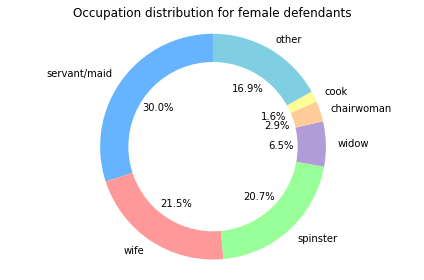

In [214]:
counts = df.occupation.value_counts()

other = 0

for i, no in counts.items():
    if no < 125:
        other += no
        counts.drop(i, inplace=True)

counts["other"] = other

labels = counts.index.to_list()
numbers = counts.to_list()

fig1, ax1 = plt.subplots()

colors = ['#66b3ff','#ff9999','#99ff99', '#b19cd9', '#ffcc99', '#fdfd96', '#80cee1', '#ffd1dc']


ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
       startangle=90,
       colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Occupation distribution for female defendants')
plt.tight_layout()
plt.savefig('../images/occupation_dist_fem.jpg')
plt.show()

In [215]:
eighteen1 = df[df['year'] <= 1750]
eighteen1 = eighteen1[eighteen1['year'] >= 1700]

eighteen2 = df[df['year'] <= 1800]
eighteen2 = eighteen2[eighteen2['year'] >= 1750]

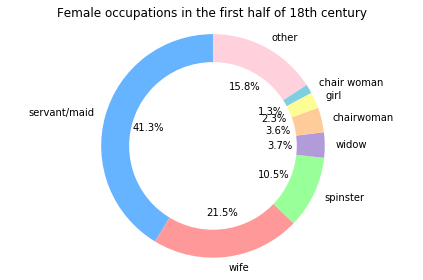

<Figure size 432x288 with 0 Axes>

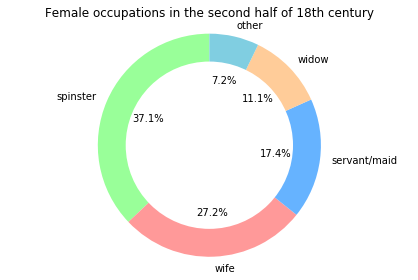

<Figure size 432x288 with 0 Axes>

In [216]:
numbers, labels = add_other(eighteen1, 'occupation', len(eighteen1)/97)
title = 'Female occupations in the first half of 18th century'
plt = get_pie_plot(numbers,labels, title, colors)
plt.savefig('../images/fem_occupations_181.jpg')

colors2 = ['#99ff99', '#ff9999', '#66b3ff',  '#ffcc99', '#80cee1']


numbers, labels = add_other(eighteen2, 'occupation', len(eighteen2)/75)
title = 'Female occupations in the second half of 18th century'
plt = get_pie_plot(numbers,labels, title, colors2)
plt.savefig('../images/fem_occupations_182.jpg')


In [217]:
nineteen1 = df[df['year'] <= 1850]
nineteen1 = nineteen1[nineteen1['year'] >= 1800]

nineteen2 = df[df['year'] <= 1900]
nineteen2 = nineteen2[nineteen2['year'] >= 1850]

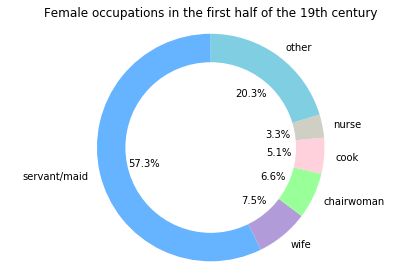

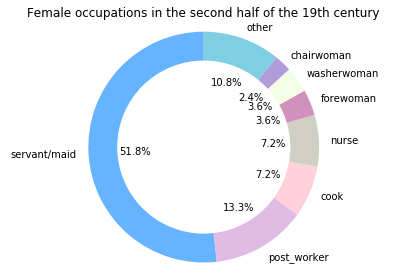

<Figure size 432x288 with 0 Axes>

In [218]:
colors = ['#66b3ff','#ff9999','#99ff99', '#b19cd9', '#ffcc99', '#fdfd96', '#80cee1', '#ffd1dc']
colors3 = ['#66b3ff', '#b19cd9','#99ff99', '#ffd1dc', '#cfcfc4', '#80cee1']
colors4 = ['#66b3ff','#e0bbe4', '#ffd1dc', '#cfcfc4', '#d291bc', '#f3ffe3', '#b19cd9', '#80cee1' ]

numbers, labels = add_other(nineteen1, 'occupation', len(nineteen1)/50)
title = 'Female occupations in the first half of the 19th century'
get_pie_plot(numbers,labels, title, colors3)


numbers, labels = add_other(nineteen2, 'occupation', len(nineteen2)/50)
title = 'Female occupations in the second half of the 19th century'
plt = get_pie_plot(numbers,labels, title, colors4)
plt.savefig('../images/fem_occupations_192.jpg')

In [204]:
no_servants = df[df.occupation != 'servant/maid']
servants = df[df.occupation == 'servant/maid']

In [205]:
def add_other(df, col, n):
    counts = df[col].value_counts()
    other = 0
    for i, no in counts.items():
        if no < n:
            other += no
            counts.drop(i, inplace=True)

    counts["other"] = other
    labels = counts.index.to_list()
    numbers = counts.to_list()
    return numbers, labels

In [206]:
def get_pie_plot(numbers, labels, title, colors):
    fig1, ax1 = plt.subplots()
    
    ax1.pie(numbers,
            labels=labels, 
            autopct = '%1.1f%%',
           colors = colors, 
           startangle=90)

    centre_circle = plt.Circle((0,0),0.75,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  

    plt.title(title)
    plt.tight_layout()
    plt.show()
    return plt

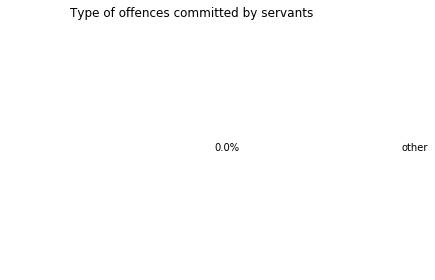

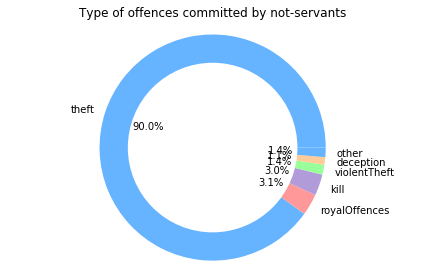

In [464]:
colors = ['#66b3ff','#ff9999','#99ff99', '#b19cd9', '#ffcc99']
colors2 = ['#66b3ff','#ff9999', '#b19cd9', '#99ff99', '#ffcc99']


numbers, labels = add_other(servants, 'offcat', 25)
title = 'Type of offences committed by servants'
get_pie_plot(numbers, labels, title, colors)

numbers, labels = add_other(no_servants, 'offcat', 95)
title = 'Type of offences committed by not-servants'
get_pie_plot(numbers, labels, title, colors2)

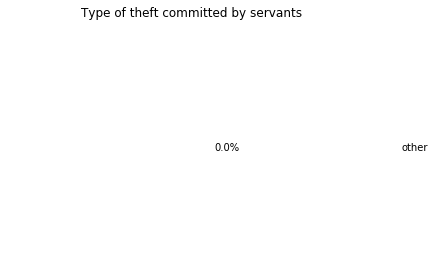

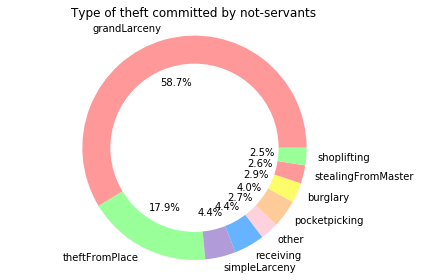

In [465]:
colors = ['#ff9999','#99ff99', '#b19cd9', '#66b3ff', '#ffd1dc','#ffcc99', '#fdfd69']

theft_servants = servants[servants.offcat == 'theft']
theft_not_servants = no_servants[no_servants.offcat == 'theft']

numbers, labels = add_other(theft_servants, 'offsubcat', 25)
title = 'Type of theft committed by servants'
get_pie_plot(numbers, labels, title, colors)

numbers, labels = add_other(theft_not_servants, 'offsubcat', 95)
title = 'Type of theft committed by not-servants'
get_pie_plot(numbers, labels, title, colors)

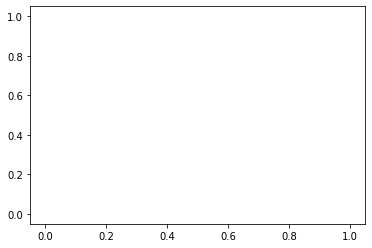

In [466]:
servant_theft = servants[servants.offcat == 'theft']

years = list()
counts = list()

for label, df in servant_theft.groupby((servant_theft["year"]//5*5)):
    years.append(label)
    counts.append(len(df))
    
plt.plot(years, counts)

In [294]:
perc_list = list()

for year, new_df in df.groupby(["year"]):
    total = len(new_df)
    servants = len(new_df[new_df["occupation"] == "servant/maid"])
    perc_list.append((servants/total*100, year))
    
pdf = pd.DataFrame(perc_list)

perc = [p for p, year in perc_list]

from statistics import mean
print(mean(perc))

41.66029030671772


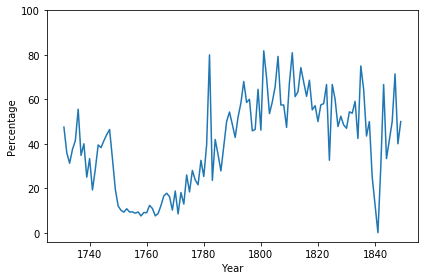

In [291]:
pdf = pdf[pdf[1] < 1850]
pdf = pdf[pdf[1] > 1730]

plt.plot(pdf[1], pdf[0])
plt.ylim(top=100)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('../images/servant_percentage.jpg')

In [ ]:
# check if trend in stealing for servants?